# Project CZ1115 - Group 8

**Name**: Benjamin Ong - U2021759D<br>
**Name**: Duong Ngoc Yen - U2020271G<br>
**Name**: Nipun - U2023894L<br>

# Problem: <br>
When making a movie, there are some factors that the producer can control, such as how much money they invest, director of the movie, genres of the movies, casts of the movie, etc. We call them **pre-elements**. <br>
The producer should always want their movies to be successful. The measurements for these sucessful are some outcome such as revenue of the movies, popularity of the movie, rating of the movie, etc. We call them **post-elements**. In these elements, revenue is a element that the producer usually care the most.<br>
Our problem: <br>
> Can the producer predict the success of the movie before it is released? Does investing more money mean generating more revenue? <br>
> After releasing the film, with the response from viewers, will it help improve the prediction performance? <br>
>Bonus for customer: building recommendation system base on content <br>

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV

## 2. Import two datasets

In [2]:
credits = pd.read_csv("credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
print("Number of records:", len(credits['movie_id']))

Number of records: 4803


### Summary: <br>
>**movie_id** - int: id of the movie <br>
>**title** - string: title of the movie <br>
>**cast** - string: json data of information of cast in the movie <br>
>**crew** - string: json data of information of cast in the movie <br>
> There are 4803 records

In [5]:
movies = pd.read_csv("movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
print("Number of records:", len(movies['title']))

Number of records: 4803


### Summary: <br>
> **Budget** - int: budget of the company <br>
> **genres** - string json data: show genres of the movie <br>
> **homapage** - string: link to the homepage <br>
> **id** - string: id of the movie <br>
> **keywords** - string json data: show keywords of the data <br>
> **original_language** - string: show the language of the movie <br>
> **original_title** - string: original title of the movie <br>
> **overview** - string: overview of the movie <br>
> **popularity** - float: popularity rate of the movie <br>
> **production_companies** - string json data: name of production company <br>
> **production_countries** - string json data: name of production countries <br>
> **release_date** - string: date of release <br>
> **revenue** - int: revenue of the movie <br>
> **runtime** - float: runtime of the movie <br>
> **spoken_languages** - string json data: list of spoken language <br>
> **status** - string: status of the movie (ex. released) <br>
> **tagline** - string: tagline of the movie <br>
> **vote_average** - float: average of vote grade <br>
> **vote_count** - int: number of vote <br>

## 3. Data extraction, curation, preparation and cleaning 

### 3.1. Data extraction

#### Check the number of missing value in this dataset

In [8]:
for item in credits:
    print("Number of missing value in ", item, ": ", credits[item].isna().sum())

Number of missing value in  movie_id :  0
Number of missing value in  title :  0
Number of missing value in  cast :  0
Number of missing value in  crew :  0


We can see that the **credits** table has no missing value

#### Extract columns from credits table

In [9]:
#Extract the columns of the credits table
movie_id = credits['movie_id']
title = credits['title']
cast = credits['cast']
crew = credits['crew']

Then we take a closer look to what data is on each column

In [10]:
movie_id[0]

19995

In [11]:
title[0]

'Avatar'

In [12]:
# This line is to display the dictionary of cast
cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [13]:
#This line is to display the dictionary of crew
crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

We can see that the cast and crew columns are very complicated string-based dictionaires with many keys for each record. Most of them are string. Therefore, we will proceed to extract the number of cast and crew in each movie as num_cast and num_crew columns as potential features to predict revenue.</br>
Also, I will extract the name of 3 first casts and the director of the movies as another feature called **name_cast** and **director** that I will need to use when building recommdation system. Also, I will lower case the charactor and remove all space for the recommendation part later. <br>
#### Extract from cast column


In [14]:
num_cast = []
name_cast = []
for i in range(len(cast)):
    temp = eval(cast[i]) #Convert the sting-based dictionaries to list of real dictionaries
    num_cast.append(len(temp)) # Append the number of cast to the list
    temp_name = []
    count = 0
    for ca in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(ca['name'].replace(" ","")))
    name_cast.append(temp_name)
print("Length of num_cast column", len(num_cast))
print("Length of name_cast column", len(name_cast))
print("List of 3 cast names in the first movie:", name_cast[0])

Length of num_cast column 4803
Length of name_cast column 4803
List of 3 cast names in the first movie: ['samworthington', 'zoesaldana', 'sigourneyweaver']


We do the similar extraction with crew

In [15]:
num_crew = []
director = []
for i in range(len(crew)):
    temp = eval(crew[i]) #Convert the sting-based dictionaries to list of real dictionaries
    num_crew.append(len(temp)) # Append the number of cast to the list
    flag = 0
    for cr in temp:
        if cr['job'] == 'Director':
            director.append(str.lower(cr['name'].replace(" ","")))
            flag = 1
    if flag == 0:
        director.append("")

In [16]:
print("Length of num_crew column:", len(num_crew))
print("Director of the first movie:", director[0])

Length of num_crew column: 4803
Director of the first movie: jamescameron


#### Summary: <br>
From the ***credits*** dataset, we have 6 variales: <br>
***- movie_id***<br>
***- title***<br>
***- num_cast***: Used for regression model<br>
***- num_crew***: Used for regression model<br>
***- name_cast***: Used for recommendation system<br>
***- director***: Used for recommendation system<br>
with totally 4803 record.
****

### Extract the data from movie dataset

#### Check the missing value and fill with some value

In [17]:
for item in movies:
    missing = movies[item].isna().sum()
    print("Number of missing value in ", item, ": ", movies[item].isna().sum())

Number of missing value in  budget :  0
Number of missing value in  genres :  0
Number of missing value in  homepage :  3091
Number of missing value in  id :  0
Number of missing value in  keywords :  0
Number of missing value in  original_language :  0
Number of missing value in  original_title :  0
Number of missing value in  overview :  3
Number of missing value in  popularity :  0
Number of missing value in  production_companies :  0
Number of missing value in  production_countries :  0
Number of missing value in  release_date :  1
Number of missing value in  revenue :  0
Number of missing value in  runtime :  2
Number of missing value in  spoken_languages :  0
Number of missing value in  status :  0
Number of missing value in  tagline :  844
Number of missing value in  title :  0
Number of missing value in  vote_average :  0
Number of missing value in  vote_count :  0


Here, we observe some missing values in some variables. We replace these missing value with some default value.

In [18]:
movies['homepage'] = movies['homepage'].fillna('')
movies['overview'] = movies['overview'].fillna('')
movies['release_date'] = movies['release_date'].fillna('')
movies['tagline'] = movies['tagline'].fillna('')
movies['runtime'] = movies['runtime'].fillna(0)

#### Extract the columns of the table

In [19]:
budget = movies['budget']
genres = movies['genres']
# homepage: I ignore this variable
# id: I have the id from the credit dataset already
keywords = movies['keywords']
original_language = movies['original_language']
original_title = movies['original_title']
popularity = movies['popularity']
production_companies = movies['production_companies']
production_countries = movies['production_countries']
release_day = movies['release_date']
revenue = movies['revenue']
runtime = movies['runtime']
spoken_languages = movies['spoken_languages']
status = movies['status']
tagline = movies['tagline']
# title: already from the credit dataset
vote_average = movies['vote_average']
vote_count = movies['vote_count']

#### Count the number of genres and the list of genres for each movies

In this part, I extract the number of genres, as a possible features for predicting revenue. Also, I extract 3 first genres, lower case them and remove space for recommendation later.

In [20]:
num_genres = []
name_genres = []
for i in range(len(genres)):
    temp = eval(genres[i])
    num_genres.append(len(temp))
    temp_name = []
    count = 0
    for ge in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(ge['name'].replace(" ","")))
    name_genres.append(temp_name)
print(num_genres[0])
print(name_genres[0])

4
['action', 'adventure', 'fantasy']


In [21]:
genres_list = set()
for na in name_genres:
    for n in na:
        genres_list.add(n)
genres_list = list(genres_list)
genres_list

['western',
 'music',
 'foreign',
 'crime',
 'comedy',
 'thriller',
 'action',
 'fantasy',
 'adventure',
 'tvmovie',
 'documentary',
 'animation',
 'romance',
 'horror',
 'drama',
 'history',
 'sciencefiction',
 'family',
 'mystery',
 'war']

#### Transform this categorical variable in to one-hot encoding

In [22]:
genres_d = pd.DataFrame()
for genres in genres_list:
    temp = []
    for i in range(len(name_genres)):
        temp.append(1 if genres in name_genres[i] else 0)
    genres_d[genres] = pd.Series(temp).values
    movies[genres] = pd.Series(temp).values

In [23]:
genres_d.head()

,western,music,foreign,crime,comedy,thriller,action,fantasy,adventure,tvmovie,documentary,animation,romance,horror,drama,history,sciencefiction,family,mystery,war
0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [24]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,documentary,animation,romance,horror,drama,history,sciencefiction,family,mystery,war
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,1,0,0,0,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,1,0,0,0


#### Extract the keywords

In [25]:
num_keywords = []
name_keywords = []
for i in range(len(keywords)):
    temp = eval(keywords[i])
    num_keywords.append(len(temp))
    temp_name = []
    count = 0
    for ke in temp:
        if count<3:
            count = count+1
            temp_name.append(str.lower(ke['name'].replace(" ","")))
    name_keywords.append(temp_name)
print(num_keywords[0])
print(name_keywords[0])

21
['cultureclash', 'future', 'spacewar']


#### Convert all features to dataframe

In [26]:
num_cast_d = pd.DataFrame(num_cast)
num_crew_d = pd.DataFrame(num_crew)
budget_d = pd.DataFrame(budget)
num_genres_d = pd.DataFrame(num_genres)
num_keywords_d = pd.DataFrame(num_keywords)
popularity_d = pd.DataFrame(popularity)
runtime_d = pd.DataFrame(runtime)
vote_average_d = pd.DataFrame(vote_average)
vote_count_d = pd.DataFrame(vote_count)
revenue_d = pd.DataFrame(revenue)


### 3.2. Normalize the distribution of the varibales by using log scale and remove outliers

In [27]:
data_o = pd.concat([revenue_d, budget_d, num_cast_d, num_crew_d, genres_d, popularity_d, vote_count_d, vote_average_d], axis = 1).reindex(budget_d.index)
data_o.columns = ['revenue', 'budget', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_o.shape

(4803, 27)

In [28]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue         4.444716
budget          2.437211
popularity      9.721416
vote_count      3.824069
vote_average   -1.959710
dtype: float64

In [29]:
data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue          33.123630
budget            7.658060
popularity      191.995820
vote_count       19.913946
vote_average      7.792363
dtype: float64

C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-p

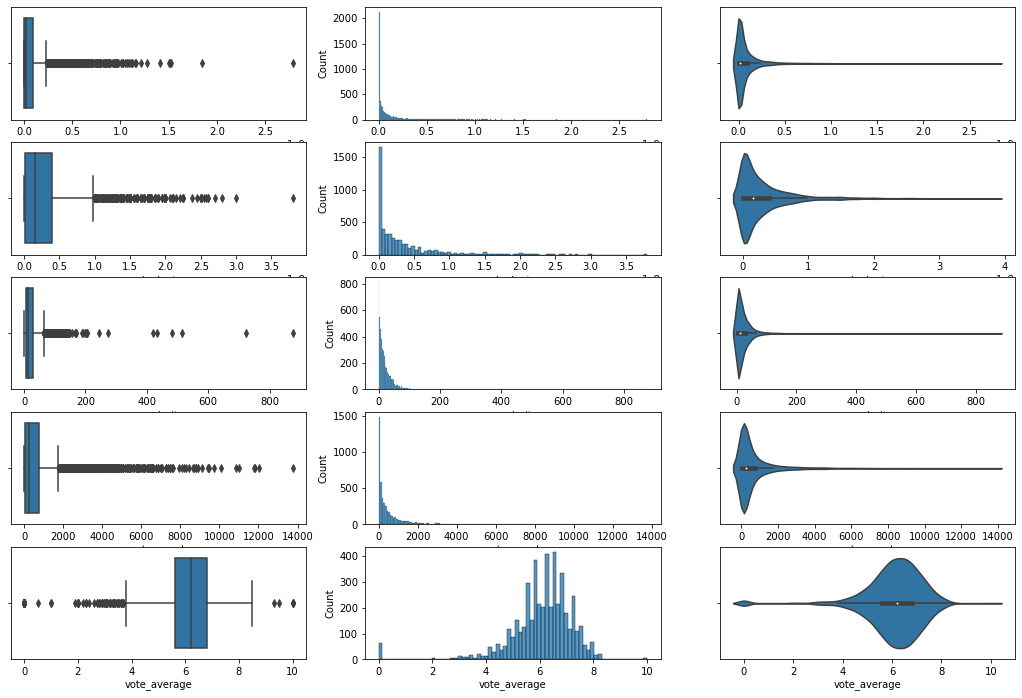

In [30]:
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_o[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_o[var], ax = axes[count,1])
    sb.violinplot(data_o[var], orient = "h", ax = axes[count,2])
    count += 1

We can see that the distribution of this data is very skewed to the left. Therefore, we proceed to some normalization and cut the outlier to make it more uniform.

In [31]:
data_process = data_o
data_process.shape

(4803, 27)

We remove all records with '0' value, as when we transform to log scale, and log(0) will go to -infinity. 

In [32]:
data_process = data_process[data_process['budget'] > 0]
data_process = data_process[data_process['revenue'] > 0]
data_process = data_process[data_process['vote_count'] > 0]
data_process = data_process[data_process['popularity'] > 0]
data_process.shape

(3227, 27)

#### Transform the dataset into log scale to make it more uniform

In [33]:
budget_log = pd.DataFrame(np.log(data_process['budget']))
revenue_log = pd.DataFrame(np.log(data_process['revenue']))
popularity_log = pd.DataFrame(np.log(data_process['popularity']))
vote_count_log = pd.DataFrame(np.log(data_process['vote_count']))

In [34]:
data_log = pd.concat([budget_log, revenue_log, num_cast_d, num_crew_d, genres_d, popularity_log, vote_count_log, vote_average_d], axis = 1).reindex(budget_log.index)
data_log.columns = ['budget', 'revenue', 'num_cast', 'num_crew', 'sciencefiction','action','western','comedy','mystery','war','documentary','history','adventure','romance','crime','family','tvmovie','drama','music','animation','fantasy','horror','foreign','thriller', 'popularity', 'vote_count', 'vote_average']
data_log.shape

(3227, 27)

Here, we use a function called ***zscore*** from stats in scipy. The function of this function is to to measure the distance of the point to mean over the standard deviation. If more than 3 times or the point lies out of 3 standard deviation, we cut that record. 

In [35]:
data_log = data_log[(np.abs(stats.zscore(data_log['budget'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['revenue'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['popularity'])) < 3)]
data_log = data_log[(np.abs(stats.zscore(data_log['vote_count'])) < 3)]
data_log.shape

(3098, 27)

C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-p

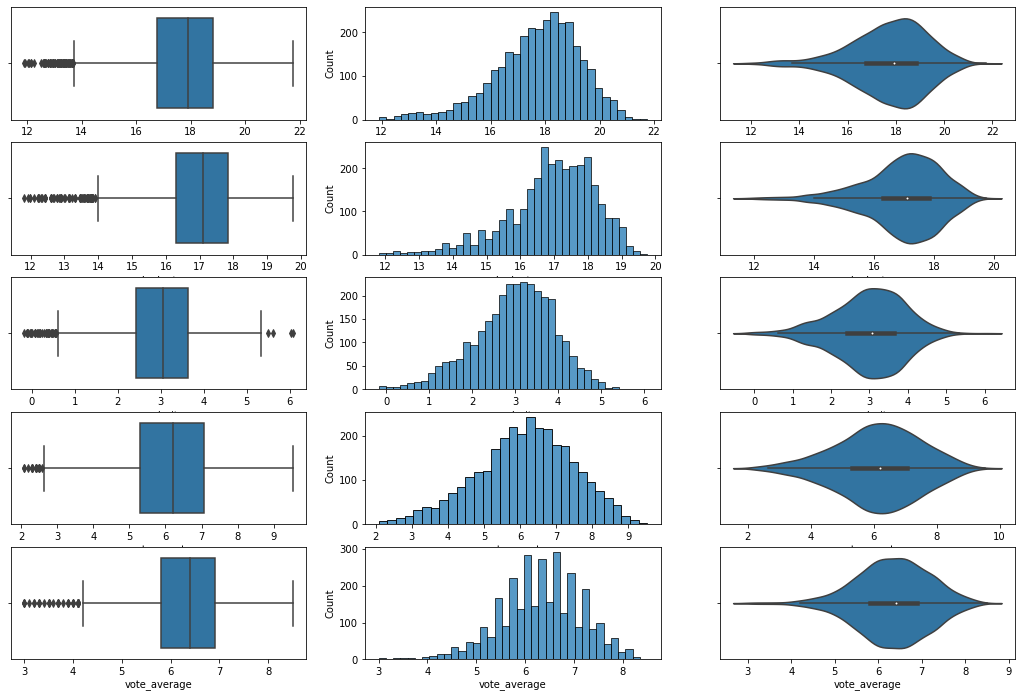

In [36]:
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in data_o.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']]:
    sb.boxplot(data_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_log[var], ax = axes[count,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[count,2])
    count += 1

In [37]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].skew()

revenue        -0.677596
budget         -0.840173
popularity     -0.413783
vote_count     -0.286842
vote_average   -0.358957
dtype: float64

In [38]:
data_log.loc[:, ['revenue', 'budget', 'popularity', 'vote_count', 'vote_average']].kurt()

revenue         0.572837
budget          0.890514
popularity      0.192931
vote_count     -0.185193
vote_average    0.332166
dtype: float64

Now, our data is more uniform and less skewed. :)

## 4. Exploratory data analysis/visualization to gather relevant insights

In [39]:
data_log.describe()

,budget,revenue,num_cast,num_crew,sciencefiction,action,western,comedy,mystery,war,...,drama,music,animation,fantasy,horror,foreign,thriller,popularity,vote_count,vote_average
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.0,3098.000000,3098.000000,3098.000000,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,16.949055,17.714582,26.576501,34.863460,0.012589,0.027114,0.0,0.145255,0.330859,0.224015,...,0.098128,0.432214,0.041317,0.103615,0.088444,0.067786,0.025823,2.986412,6.131337,6.325339
std,1.273891,1.576674,21.665511,35.371232,0.111509,0.162443,0.0,0.352415,0.470598,0.417000,...,0.297535,0.495464,0.199054,0.304810,0.283986,0.251418,0.158633,0.931786,1.344940,0.844225
min,11.805632,11.894112,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.782571,15.000000,12.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.420102,5.299564,5.800000
50%,17.111347,17.909855,20.000000,21.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.055700,6.210600,6.400000
75%,17.854137,18.832300,31.000000,45.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.640710,7.075809,6.900000
max,19.755682,21.748578,224.000000,435.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.073686,9.528940,8.500000


In [40]:
data_log[['budget','revenue', 'num_cast', 'num_crew', 'popularity', 'vote_count', 'vote_average']].describe()

,budget,revenue,num_cast,num_crew,popularity,vote_count,vote_average
count,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,16.949055,17.714582,26.576501,34.863460,2.986412,6.131337,6.325339
std,1.273891,1.576674,21.665511,35.371232,0.931786,1.344940,0.844225
min,11.805632,11.894112,0.000000,1.000000,-0.179585,2.079442,3.000000
25%,16.300417,16.782571,15.000000,12.000000,2.420102,5.299564,5.800000
50%,17.111347,17.909855,20.000000,21.000000,3.055700,6.210600,6.400000
75%,17.854137,18.832300,31.000000,45.000000,3.640710,7.075809,6.900000
max,19.755682,21.748578,224.000000,435.000000,6.073686,9.528940,8.500000


### Revenue

C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue'>

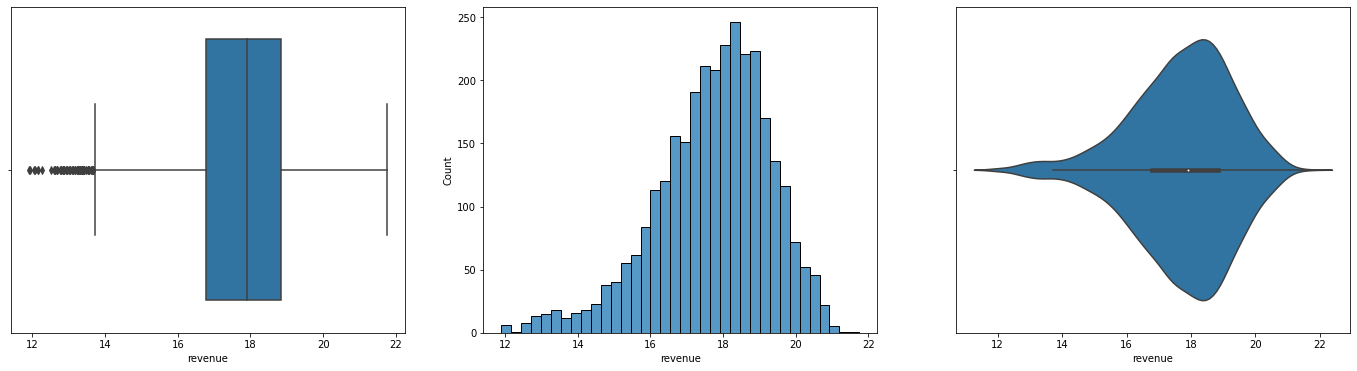

In [41]:
f, axes = plt.subplots(1, 3, figsize =(24, 6))
sb.boxplot(data_log['revenue'], orient = "h", ax = axes[0])
sb.histplot(data_log['revenue'], ax = axes[1])
sb.violinplot(data_log['revenue'], orient = "h", ax = axes[2])

### 4.1. Pre-elements uni-varite analysis

Now, we have 4 pre-elements: <br>
> **budget** <br>
> **num_cast**<br>
> **num_crew**<br>
> **genres**: 20 genres are used as 20 different features<br>

#### Budget, num_cast, num_crew

C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-p

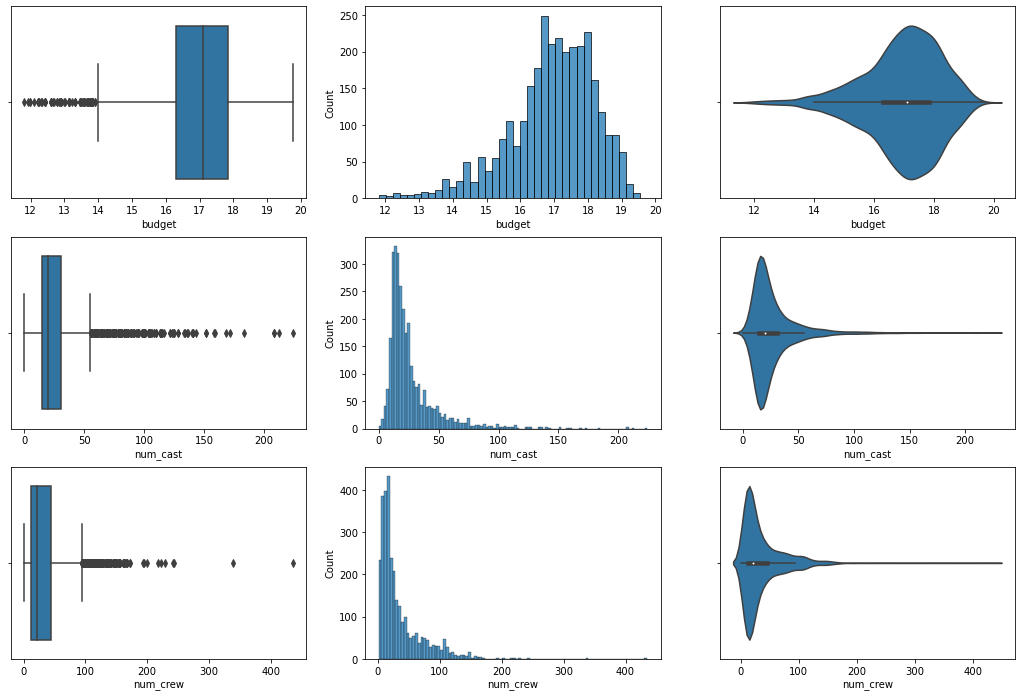

In [42]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in ['budget', 'num_cast', 'num_crew']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_log[var], ax = axes[count,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[count,2])
    count += 1

#### Genres

In [43]:
num_genres = data_log[genres_list].sum(axis = 0)
num_genres

western              0
music             1339
foreign            210
crime               28
comedy             450
thriller            80
action              84
fantasy            321
adventure          622
tvmovie            477
documentary        877
animation          128
romance              0
horror             274
drama              304
history            278
sciencefiction      39
family             177
mystery           1025
war                694
dtype: int64

Text(0, 0.5, 'Genres Count')

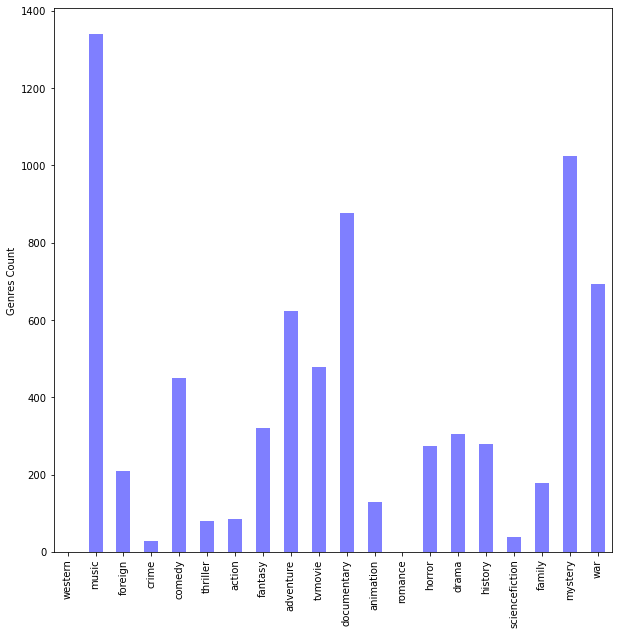

In [44]:
plt.subplots(figsize=(10, 10))
num_genres.plot.bar(align='center', alpha=0.5, color='blue')
#y_pos = np.arange(num_genres)
#plt.xticks(y_pos, name_genres)
plt.ylabel('Genres Count')

### 4.2. Post elements uni-variate analysis

We have 3 post elements: <br>
> **popularity** <br>
> **vote_count** <br>
> **vote_average** <br>

C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\root\anaconda3\lib\site-p

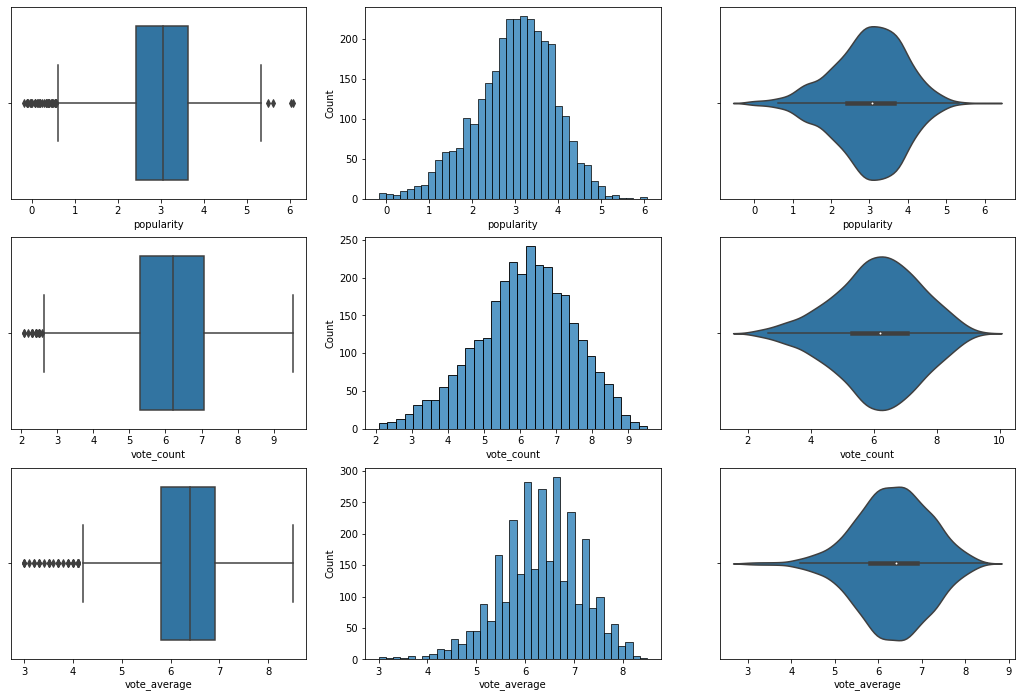

In [45]:
f, axes = plt.subplots(3, 3, figsize=(18, 12))

count = 0
for var in ['popularity', 'vote_count', 'vote_average']:
    sb.boxplot(data_log[var], orient = "h", ax = axes[count,0])
    sb.histplot(data_log[var], ax = axes[count,1])
    sb.violinplot(data_log[var], orient = "h", ax = axes[count,2])
    count += 1

### 5.2. Multi-variate exploratory

In [46]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

music            -0.199666
crime            -0.084818
tvmovie          -0.073575
drama            -0.062023
sciencefiction   -0.061680
comedy           -0.059444
animation        -0.036693
action           -0.028161
mystery          -0.019405
foreign          -0.017789
thriller         -0.011921
war               0.013221
fantasy           0.070776
vote_average      0.125916
history           0.148400
horror            0.163918
family            0.164734
documentary       0.165788
adventure         0.251319
num_cast          0.282160
num_crew          0.349847
budget            0.638766
popularity        0.652001
vote_count        0.707789
revenue           1.000000
western                NaN
romance                NaN
Name: revenue, dtype: float64

we can see that some pre-elements that has a higher correlation to revenue is **budget, num_crew, num_cast, thriller**

In [47]:
data_F = pd.DataFrame(data_log[['revenue', 'budget', 'num_crew', 'num_cast', 'thriller']])

<AxesSubplot:>

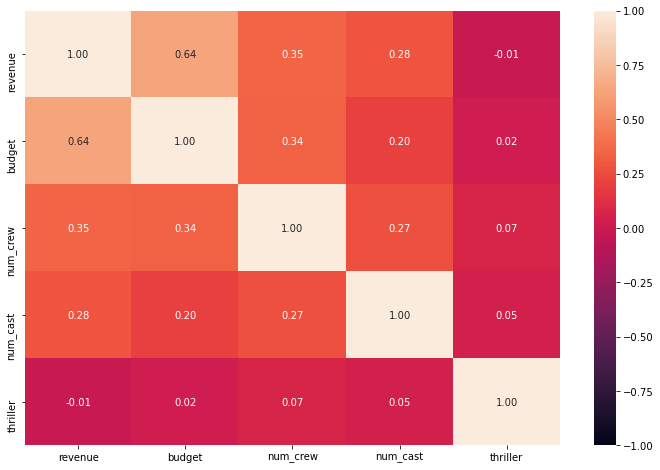

In [48]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_F.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

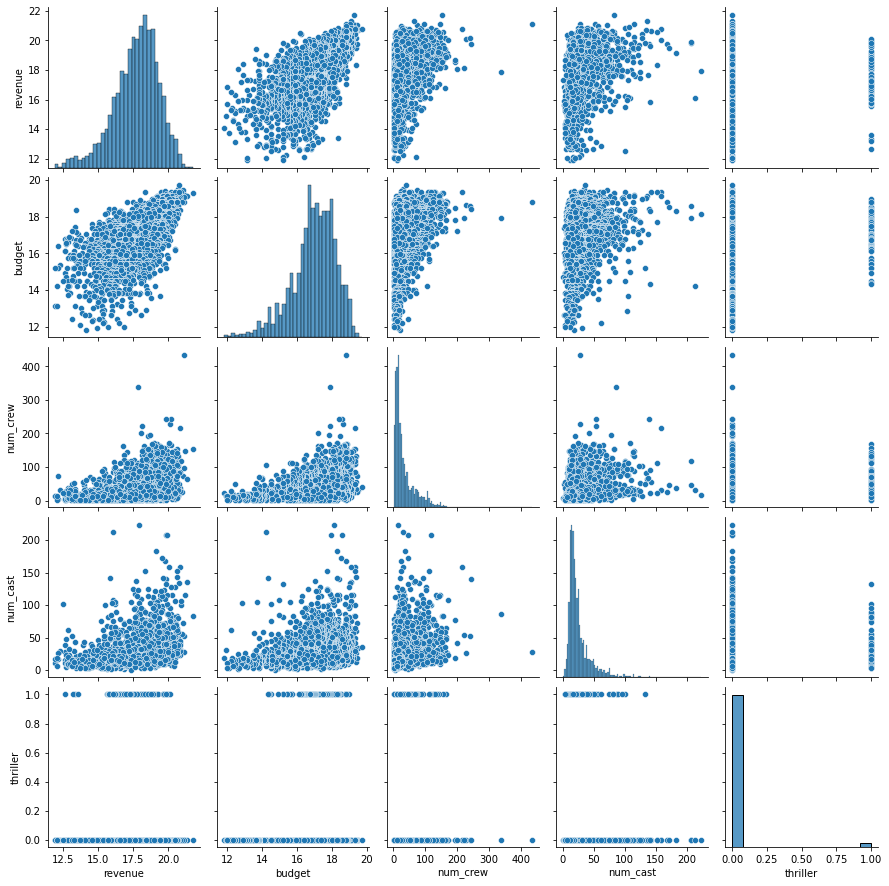

In [49]:
sb.pairplot(data = data_F)

From the correlation matrix, there are some post-elements that have high correlation such as **popularity, vote_count**

In [50]:
data_P = pd.DataFrame(data_log[['revenue', 'popularity', 'vote_count']])

<AxesSubplot:>

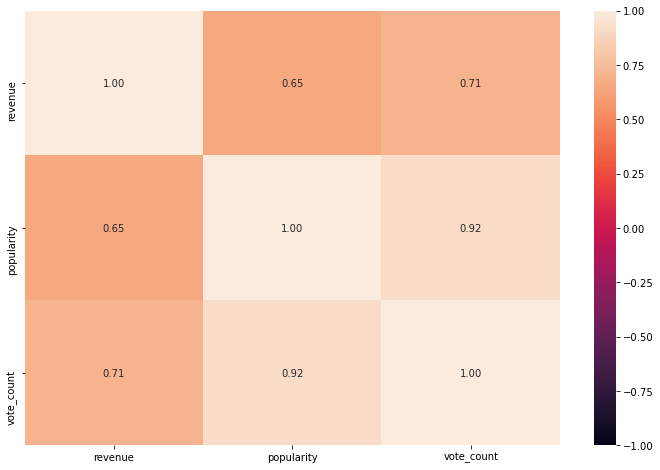

In [51]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(data_P.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

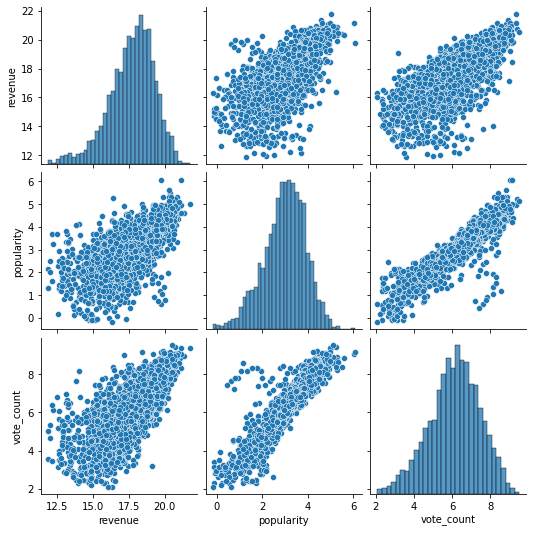

In [52]:
sb.pairplot(data = data_P)

## 5. Building regression models:

Some note on data<br>
> **data_F**: preprocessed pre-elements data frame <br>
> **data_P**: preprocessed post-elements data frame <br>
> **data_log**: all elements

### Model 1: Linear regression model with budget using LinearRegression

Budget is the variable that has highest correlation to revenue that the producer can control. The budget is the money they have to give out, while the revenue is the money they receive. Now, let's build a model to predict revenue base on budget only to see if we can predict the revenue based on what we give out.

In [53]:
#data_train = data_log.drop(['revenue'], axis = 1)
data_train = pd.DataFrame(data_log['budget'])
data_test = pd.DataFrame(data_log['revenue'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size = 0.25)
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of train set: (2323, 1) (2323, 1)
Shape of test set: (775, 1) (775, 1)


In [55]:
linreg = LinearRegression()         
linreg.fit(X_train, y_train)

LinearRegression()

In [56]:
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [4.06793062]
Coefficients of Regression 	: a =  [[0.80516293]]



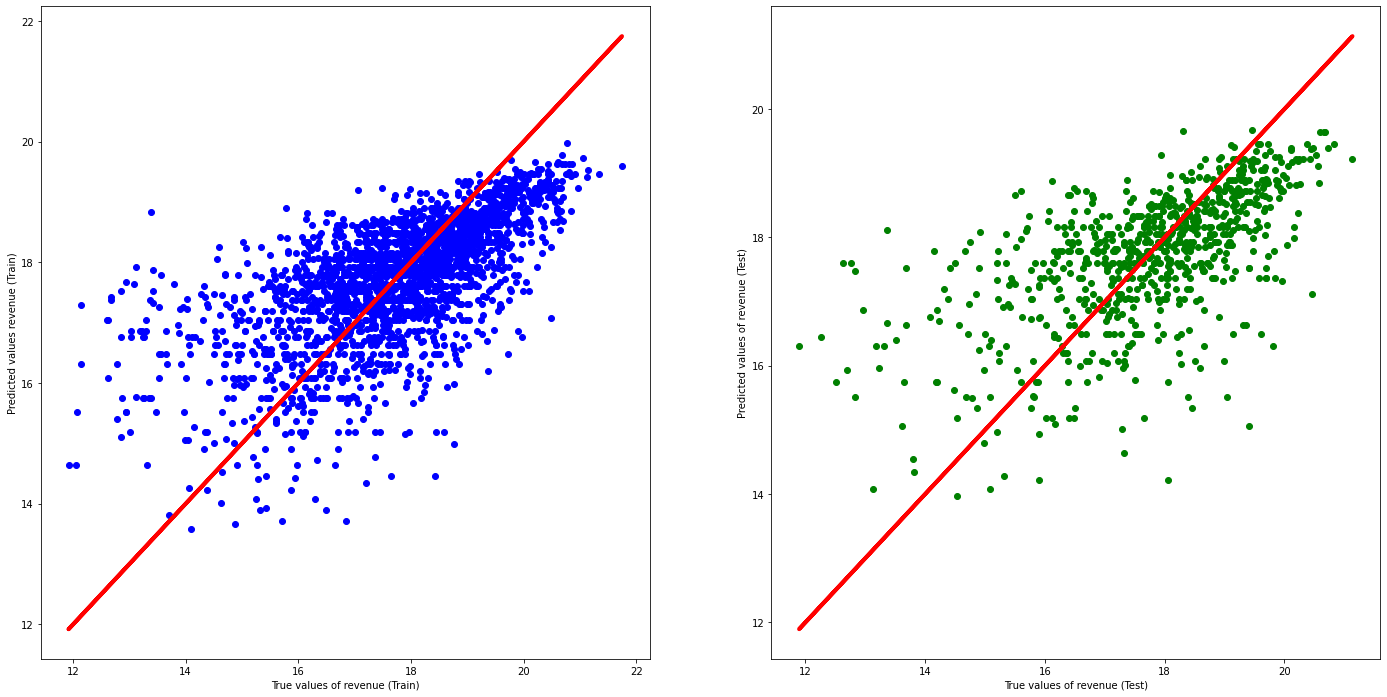

In [57]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()

In [58]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4222751661390304
Mean Squared Error (MSE) 	: 1.4329687330279077

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3650697699696076
Mean Squared Error (MSE) 	: 1.5868681670030356



#### Some insights from budget
We can see that the performance is quite poor with low score. There are some correlation between budget and revenue but not very hgih. There is a trend in the data pattern, which means increase budget can also contribute to increase the revenue, but the formular (model) base on budget is not enough to predict the upcoming revenue.<br> 
The producer, in this case, can not just base on budget to predict there success. There should also be other factors that affect the revenue as well. <br>
Let's build a model with other pre-elements to see if there is any improvement.

### Model 2: Regression model base on pre_elements that producer can control using LinearRegression

Shape of train set: (2323, 4) (2323, 1)
Shape of test set: (775, 4) (775, 1)
Intercept of Regression 	: b =  [5.37581209]
Coefficients of Regression 	: a =  [[ 0.70171305  0.00520173  0.00973302 -0.25080994]]



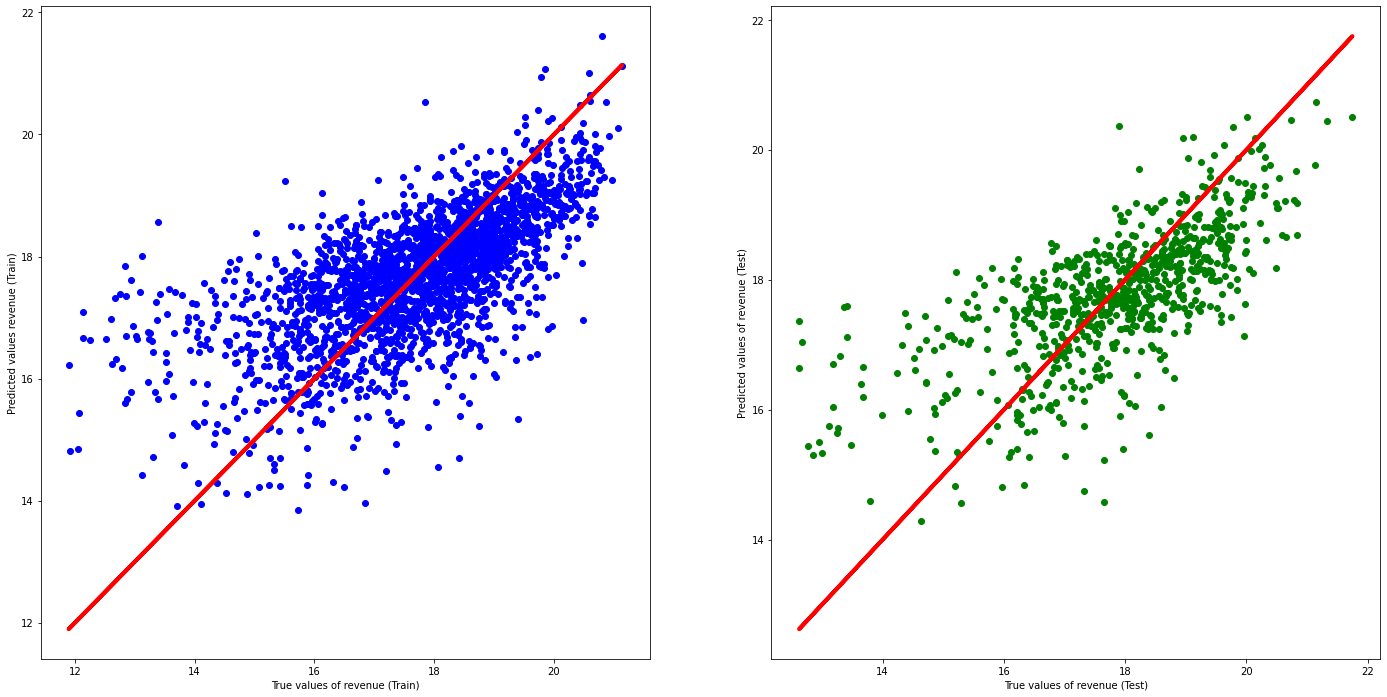

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43731061942379756
Mean Squared Error (MSE) 	: 1.4103020839371667

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4691034421060092
Mean Squared Error (MSE) 	: 1.2792642506364509



In [59]:
data_train = data_F.drop(['revenue'], axis = 1)
data_test = pd.DataFrame(data_F['revenue'])
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size = 0.25)
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
linreg = LinearRegression()         
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Now, we can see that the performance seems to be improved, but not very significant. There is a formular (model) to predict revenue but there performance is not very high. Therefore, before release, it is hard for the company to predicts the revenue. 

Let's take a look again at the correlation matrix with other post-elements factor as well.

In [60]:
correlation = data_log.corr()['revenue'][:]
correlation.sort_values()

music            -0.199666
crime            -0.084818
tvmovie          -0.073575
drama            -0.062023
sciencefiction   -0.061680
comedy           -0.059444
animation        -0.036693
action           -0.028161
mystery          -0.019405
foreign          -0.017789
thriller         -0.011921
war               0.013221
fantasy           0.070776
vote_average      0.125916
history           0.148400
horror            0.163918
family            0.164734
documentary       0.165788
adventure         0.251319
num_cast          0.282160
num_crew          0.349847
budget            0.638766
popularity        0.652001
vote_count        0.707789
revenue           1.000000
western                NaN
romance                NaN
Name: revenue, dtype: float64

We can see that, the correlation is higher on some post-elements, such as popularity, vote_count. Therefore, it seems to be easier to use post elements to predict the revenue of the movie by some post-elements.

### Model 3: Regression model base on post-elements by using LinearSVR

Shape of train set: (2323, 2) (2323, 1)
Shape of test set: (775, 2) (775, 1)
Intercept of Regression 	: b =  [17.90224598]
Coefficients of Regression 	: a =  [0.06471383 1.06511844]



C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


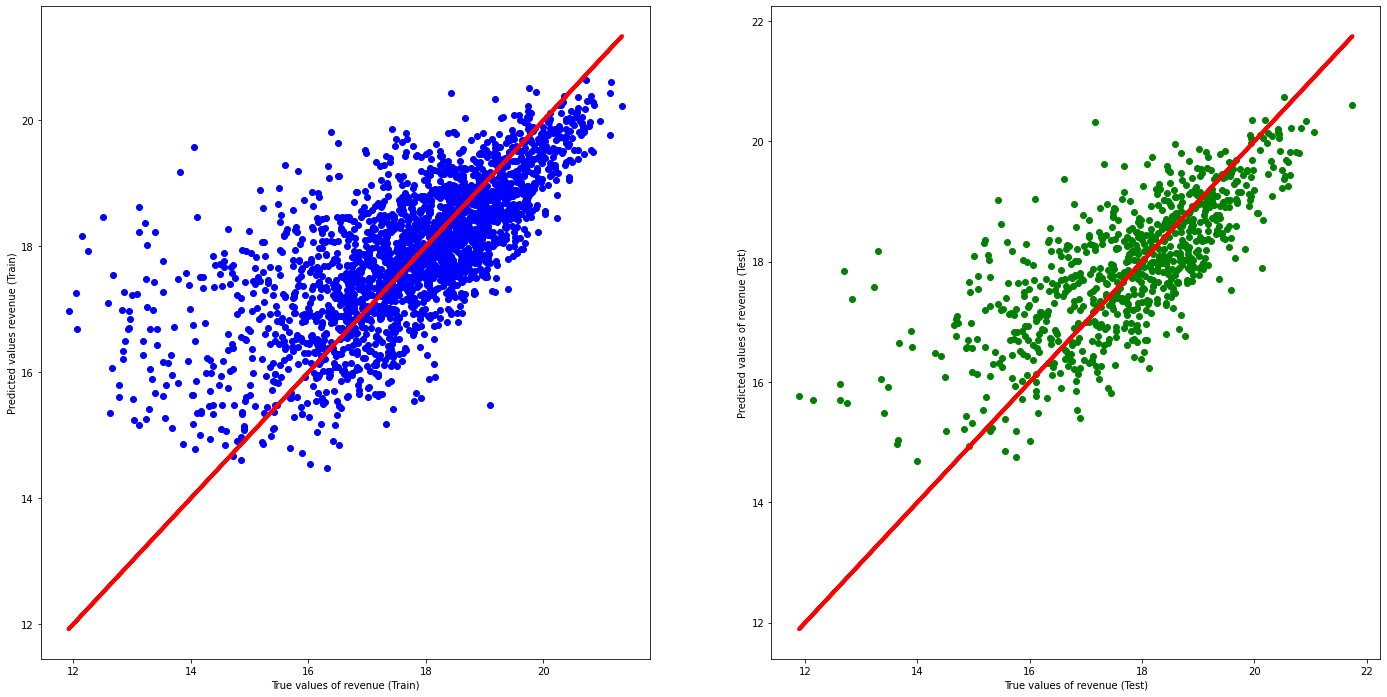

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4744305149814849
Mean Squared Error (MSE) 	: 1.3230809827046754

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5224656116542886
Mean Squared Error (MSE) 	: 1.1403633184360624



In [61]:
data_train = data_P.drop(['revenue'], axis = 1)
data_test = pd.DataFrame(data_P['revenue'])
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size = 0.25)
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
svr = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))  
svr.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', svr.named_steps['linearsvr'].intercept_)
print('Coefficients of Regression \t: a = ', svr.named_steps['linearsvr'].coef_)
print()
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", svr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", svr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The performance seems to be improved. Now, let's see if we know all the pre-elements and post-elements if the performance can be improved

### Model 4: Predicting revenue base on both pre and post elements by using RidgeCV

Shape of train set: (2323, 26) (2323, 1)
Shape of test set: (775, 26) (775, 1)
Intercept of Regression 	: b =  [5.97266226]
Coefficients of Regression 	: a =  [[ 4.79644752e-01  1.40182564e-03 -3.59320920e-04 -3.27969637e-02
   1.83408096e-01  0.00000000e+00 -1.57885356e-01  5.68373730e-02
  -5.74882706e-02 -6.05449529e-02 -9.18916656e-02  1.03136443e-01
   0.00000000e+00  1.34104971e-01 -1.01407015e-02  1.39348779e-01
   8.27838143e-02 -1.64180631e-01  9.89570601e-02 -2.64184284e-01
   1.95795460e-01 -5.31272943e-02 -6.30459200e-02  4.82484481e-02
   5.81471586e-01 -8.24369380e-03]]



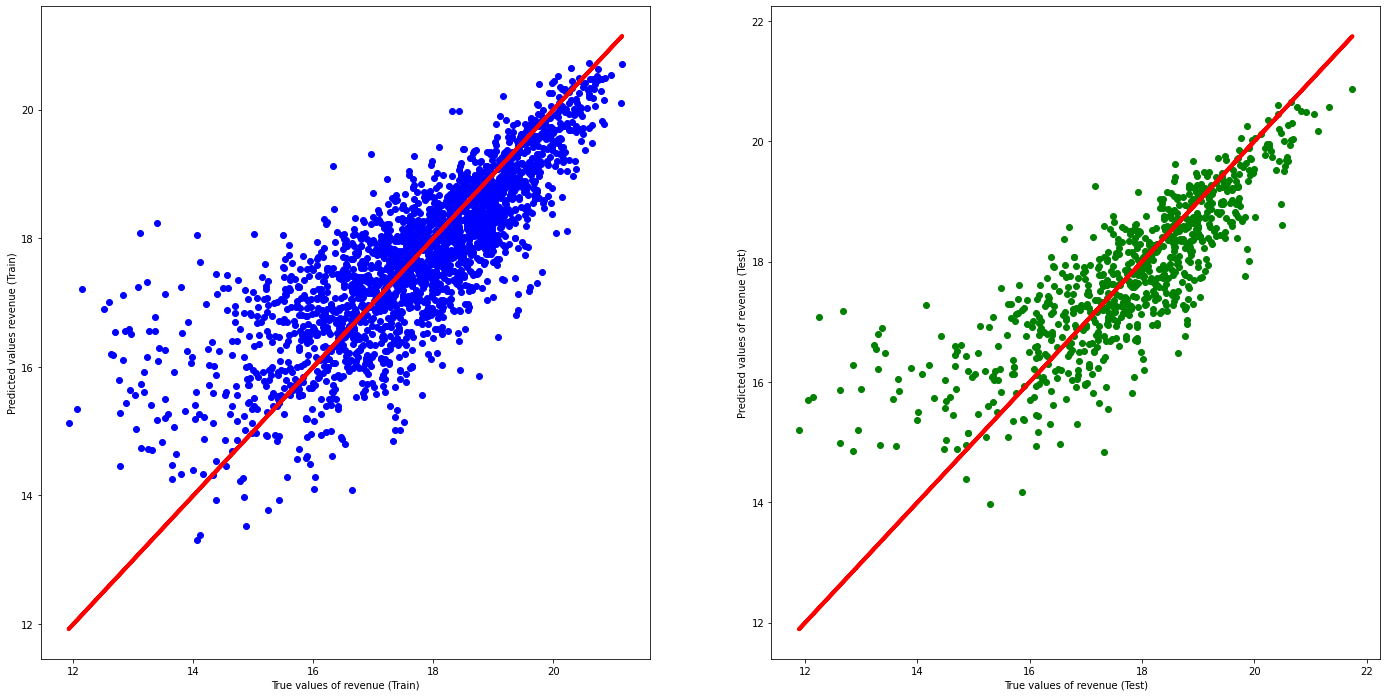

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6434147317776827
Mean Squared Error (MSE) 	: 0.8671576663630974

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6718864594995169
Mean Squared Error (MSE) 	: 0.8675820451411278



In [62]:
data_train = data_log.drop(['revenue'], axis = 1)
data_test = pd.DataFrame(data_log['revenue'])
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size = 0.25)
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

linreg = RidgeCV(alphas=np.arange(70,100,0.1), fit_intercept=True)    
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
axes[0].set_xlabel("True values of revenue (Train)")
axes[0].set_ylabel("Predicted values revenue (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
axes[1].set_xlabel("True values of revenue (Test)")
axes[1].set_ylabel("Predicted values of revenue (Test)")
plt.show()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

We can see that, now, the performance of the model is much enhanced. 

## 7. Bonus: recommendation system base on content

Summary of the variables used:

- director: A list of director in each movie

- name_cast: A list of list of cast in each movie

- name_keywords: The list of list of keywords in each movie

- name_genres: The list of list of genres in each movie

We use director, cast, genres and keywords to build the recommendation system. With each variables, we choose only the first 3 elements (except for director as it has only one element)

In [63]:
combine = []
for item in zip(name_keywords, name_genres, director, name_cast):
    temp = ''
    for i in range(4):
        if i == 2:
            if temp != '':
                temp = temp + ' ' + item[2]
            else:
                temp = temp + item[2]
        else:
            for c in item[i]:
                if temp != '':
                    temp = temp + ' ' + c
                else:
                    temp = temp + c
    combine.append(temp)
    count = count+1

In [64]:
combine = pd.DataFrame(combine)
data_re = pd.concat([title, combine], axis = 1).reindex(title.index)
data_re.columns = ['title', 'combine']
data_re

,title,combine
0,Avatar,cultureclash future spacewar action adventure ...
1,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland adventure fantasy...
2,Spectre,spy basedonnovel secretagent action adventure ...
3,The Dark Knight Rises,dccomics crimefighter terrorist action crime d...
4,John Carter,basedonnovel mars medallion action adventure s...
...,...,...
4798,El Mariachi,unitedstates–mexicobarrier legs arms action cr...
4799,Newlyweds,comedy romance davidhand edwardburns kerrybish...
4800,"Signed, Sealed, Delivered",date loveatfirstsight narration comedy drama r...
4801,Shanghai Calling,samuelarmstrong danielhenney elizacoupe billpa...


We build a recommendation system based on the content. The input is the title of a film and we will recommend some films that are similar to the film, base on the combine variable

In [65]:
cv = CountVectorizer(stop_words = 'english')
count_matrix = cv.fit_transform(data_re['combine'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [66]:
data_re = data_re.reset_index()
indices = pd.Series(data_re.index, index=data_re['title'])

In [67]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data_re['title'].iloc[movie_indices]

In [68]:
get_recommendations('Avatar', cosine_sim)

206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

In [69]:
get_recommendations('Batman Begins', cosine_sim)

3          The Dark Knight Rises
65               The Dark Knight
4638    Amidst the Devil's Wings
982                Run All Night
3603           Lone Wolf McQuade
1742              Brick Mansions
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
Name: title, dtype: object

In [70]:
get_recommendations('Romeo Is Bleeding', cosine_sim)

4638    Amidst the Devil's Wings
2154                Street Kings
3          The Dark Knight Rises
4408              Jimmy and Judy
1986                      Faster
3326              Black November
1503                      Takers
747               Gangster Squad
1253               Kiss of Death
1278                  The Gunman
Name: title, dtype: object

So with every movie as input, the program will calculate the similarity score with other movies and finds the 10 most similar movies with the input movie to be the input.

***
## Reference:
Brownlee, Jason. “How to Remove Outliers for Machine Learning.” Machine Learning Mastery, 18 Aug. 2020, machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/.  <br><br>
WillKoehrsen. “WillKoehrsen/Data-Analysis.” GitHub, github.com/WillKoehrsen/Data-Analysis/tree/master/random_forest_explained. <br><br>
Sangeetha, Jame. “Json Parsing & Linear Regression Analysis.” Kaggle, Kaggle, 28 Mar. 2018, www.kaggle.com/sanjames/json-parsing-linear-regression-analysis. <br><br>
F.koglu, et al. “How Can I Increase the Accuracy of My Linear Regression Model?(Machine Learning with Python).” Stack Overflow, 1 Sept. 1966, stackoverflow.com/questions/47577168/how-can-i-increase-the-accuracy-of-my-linear-regression-modelmachine-learning. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.linear_model.RidgeCV¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html. <br><br>
“Sklearn.svm.LinearSVR¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html. <br><br>
Kushbhatnagar. “Movie Recommendation System.” Kaggle, Kaggle, 6 Apr. 2021, www.kaggle.com/kushbhatnagar/movie-recommendation-system. <br><br>
Thomaskonstantin. “Predicting Revenue Linear Regression And Tfidf.” Kaggle, Kaggle, 24 Oct. 2020, www.kaggle.com/thomaskonstantin/predicting-revenue-linear-regression-and-tfidf. <br><br>
Wade, Corey. “Transforming Skewed Data.” Medium, Towards Data Science, 16 Nov. 2020, towardsdatascience.com/transforming-skewed-data-73da4c2d0d16. <br><br>
Radečić, Dario. “Top 3 Methods for Handling Skewed Data.” Medium, Towards Data Science, 4 Jan. 2020, towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45. <br><br>
Team, Towards AI. “How, When, and Why Should You Normalize / Standardize / Rescale Your Data?” Towards AI - The Best of Tech, Science, and Engineering, 29 May 2020, towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff. <br><br>
“Overfitting in Machine Learning: What It Is and How to Prevent It.” EliteDataScience, 23 May 2020, elitedatascience.com/overfitting-in-machine-learning. <br><br>


